<a href="https://colab.research.google.com/github/shaikh-7abish/Machine-Learning-Projects/blob/main/Deep%20Learning/Assignment/AssignmentML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook is created in Google Colab, To use the notebook open it in Google Colab and Run all cells.

# Data Acquisition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import zipfile
import numpy as np

In [2]:
# change this to zip file folder
file = 'drive/MyDrive/Machine Learning Assignment/'
# Extracting Zip file
zip_ref = zipfile.ZipFile(file + os.listdir(file)[0])
zip_ref.extractall()
zip_ref.close()

# Data Processing

In [3]:
# creating variables to accessing folder
img_fold = 'dataset/Images/'
labels_fold = 'dataset/labels/'

# reading annotations
target = []
for i in os.listdir(labels_fold):
  with open(labels_fold + i) as file:
    line = file.read()
    target.append([i, line])

In [6]:
# creating function to change the file name from txt extension to jpg
def txt_to_jpg(raw):
  labels = []
  for i in raw:
    labels.append([(i[0].split('.')[0]), i[1]])

  for i in range(len(raw)):
    labels[i] = [labels[i][0] + '.jpg', labels[i][1]]
  return labels

# deleting empty instances from annotations
def deleting_empty(labels):
  for itr in range(2):
    for i in labels:
      if i[1] == '':
        labels.remove(i)

  labels.sort()
  return labels

# saving cleaned image name in a variable
def img_name(labels):
  img = []
  for i in labels:
    img.append(img_fold + i[0])
  img.sort()
  return img

# creating arrays of annotations for model training
def labels_to_array(labels):
  label = []
  for i in labels:
    label.append(i[1].split(' '))

  label = np.array(label, dtype=float)

  return label

removedtxt = txt_to_jpg(target)
labels = deleting_empty(removedtxt)
img = img_name(labels)
label = labels_to_array(labels)

In [16]:
# importing required libraries and modules
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt

In [8]:
# function to preprocess an image
def img_preprocess(images):
  # laoding image from dataset
  img = image.load_img(images, target_size=(224, 224))

  # Converting a image instance to a numpy array.
  img_array = image.img_to_array(img)

  # expanding dimension/shape of array
  img_array = np.expand_dims(img_array, axis=0)

  # Preprocessesing a numpy array encoding a batch of images.
  prepro_image = preprocess_input(img_array)

  return prepro_image

# function to preprocess multiple images or single image and return it as a numpy array for model training
def input_preprocess(images):
  preprocessed_img = []

  # if single image is passed for preprocessing
  if isinstance(images, str):
    # preprocessing image
    img = img_preprocess(images)

    # converting it to array
    preprocessed_img = np.array(img)

    # changing shape of image to (None, 224, 224, 3)
    preprocessed_img = np.reshape(preprocessed_img,(preprocessed_img.shape[0],224,224,3))

    return preprocessed_img

  # if multiple images are passed for preprocessing
  elif isinstance(images, list):
    # iterating over lists of image paths
    for i in images:
      # preprocessing image
      img = img_preprocess(i)
      preprocessed_img.append(img)

      # converting it to array
      preprocessed_img_array = np.array(preprocessed_img)

      # changing shape of image to (None, 224, 224, 3)
      preprocessed_img_array = np.reshape(preprocessed_img,(preprocessed_img_array.shape[0],224,224,3))
    return preprocessed_img_array

  # if passed parameter is not image path
  else:
    print('Please pass the path to image or images')

images = input_preprocess(img)

# Model Development

In [9]:
# model development
model = keras.Sequential([
    # Convolution layers for Image input
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
    # Max Pooling for getting the most out of data
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatting the data for fully connected layers
    layers.Flatten(),

    # fully connected layer with 128 nodes
    layers.Dense(128, activation='relu'),

    # fully connected layers with 5 nodes for output
    # 5 for binary presence + x, y, w, h coordinates
    layers.Dense(5, activation='sigmoid')
])

# compiling model with optimizer, loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# detail of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

# Training

In [11]:
# trianing the model with testing images
model.fit(images[:67], label[:67], epochs= 20, verbose = 1)

Epoch 1/20
3/3 [==============================] - 8s 2s/step - loss: 631.0086 - accuracy: 0.4030
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 413.8784 - accuracy: 0.8507
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 121.2777 - accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 10.8693 - accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 5s 2s/step - loss: 1.7648 - accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 7s 2s/step - loss: 0.6430 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 5s 2s/step - loss: 0.6450 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 7s 2s/step - loss: 0.6518 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 5s 2s/step - loss: 0.6532 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 6s 2s/step - loss: 0.6545 - accuracy: 1.0000
Epoch 11/20
3/3 [=========================

# Model 2 Development

In [12]:
model2 = keras.Sequential([
    # Convolution layers for Image input
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(224,224,3)),
    # Max Pooling for getting the most out of data
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatting the data for fully connected layers
    layers.Flatten(),

    # fully connected layer with 128 nodes and 64 nodes
    layers.Dense(128,activation = 'relu'),
    layers.Dense(64, activation = 'relu'),

    # fully connected layers with 5 nodes for output
    # 5 for binary presence + x, y, w, h coordinates
    layers.Dense(5, activation = 'sigmoid')
])

# compiling model with optimizer, loss function
# detail of the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 128)      

# Training Model 2

In [13]:
# training model
model2.fit(images[:67], label[:67], epochs= 20, verbose = 1)

Epoch 1/20
3/3 [==============================] - 8s 2s/step - loss: 37.4110 - accuracy: 0.4776
Epoch 2/20
3/3 [==============================] - 8s 2s/step - loss: 12.6997 - accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 0.9816 - accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 8s 2s/step - loss: 0.6056 - accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.5244 - accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 8s 2s/step - loss: 0.4769 - accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.4927 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 8s 2s/step - loss: 0.4932 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 6s 2s/step - loss: 0.4695 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 8s 2s/step - loss: 0.4563 - accuracy: 1.0000
Epoch 11/20
3/3 [==============================

#  Testing and Evaluation

In [14]:
# creating function for visualization of box predicted from the model on image
def visual(img_name, predictions):
  # reading the iamge
  annot_image = cv2.imread(img_name)
  # getting prediction
  bbox = list(predictions)

  # Coordinates and dimensions of the rectangle
  line, x, y, width, height = [i for i in bbox]

  # Convert the coordinates to pixel values
  h, w, _ = annot_image.shape

  # x and y pixel of the top left corner of the box
  x_pixel = int(x * w)
  y_pixel = int(y * h)

  # width and height of the box
  width_pixel = int(width * w)
  height_pixel = int(height * h)

  # Draw the rectangle on the image
  annot_image = cv2.rectangle(annot_image, (x_pixel, y_pixel), (x_pixel + width_pixel, y_pixel + height_pixel), (255, 0, 0), 2)
  # (255, 0, 0) is the color in BGR format, 2 is the thickness

  # Desired dimensions (width, height)
  resize_width, resize_height = 500, 500

  # Resizing the image for better look
  resized_image = cv2.resize(annot_image, (resize_width, resize_height))

  # visualizing image
  from google.colab.patches import cv2_imshow
  cv2_imshow(resized_image)

### Identified and Extracted Predictions from stock chart images.

Identified and Extracted Predictions from stock chart images.


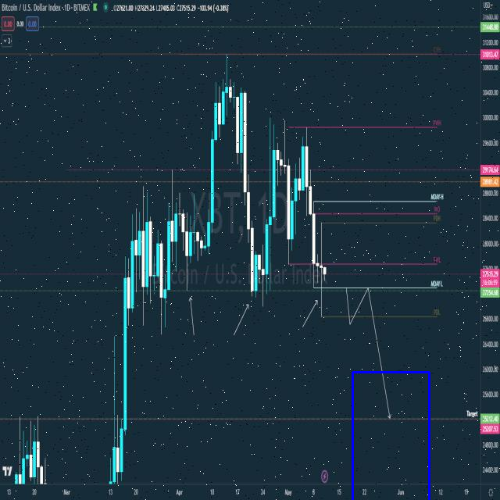

In [28]:
# testing with a single instance of the data
# this is unseen data for the model
test_label = label[51]
test_img_dir = img[51]
# preprocessing the image
test_img = input_preprocess(test_img_dir)

# predicting from model
predictions = model2(test_img)
print('Identified and Extracted Predictions from stock chart images.')
# visualizing image and predictions
visual(test_img_dir, predictions[0])

Already Predicted


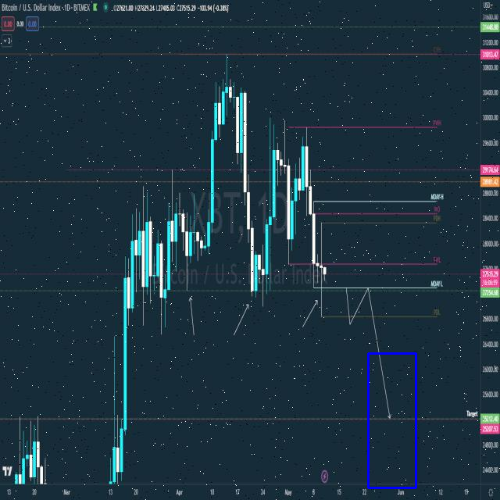

In [29]:
# visualizing the original image and annotation
print('Already Predicted')
visual(test_img_dir, test_label)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = test_label  # true values
y_pred = predictions[0]  # predicted values

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.0011731047681419488
Mean Absolute Error: 0.02696384608745575


In [41]:
# testing with a single instance of the data
# this is unseen data for the model
test_label_batch = label[65:]
test_img_dir_batch = img[65:]
# preprocessing the image
test_img = input_preprocess(test_img_dir_batch)

# predicting from model
predictions_batch = []
predictions_batch.append(model2(test_img))

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_true = test_label_batch  # true values
y_pred = predictions_batch[0]  # predicted values

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.00851463723792233
Mean Absolute Error: 0.060294033735990515
